In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [43]:
data = {
    'experience': [1, 3, 5, 7, 10, 12, 15, 18, 20, 25],  # Years of experience
    'salary': [2000, 2500, 3000, 3500, 4000, 4500, 5200, 6000, 6500, 7000],  # Salary levels
    'promotion': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # Whether the person got promoted
}
df = pd.DataFrame(data)

In [44]:
X = df[['experience', 'salary']]
y = df['promotion']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [48]:
x_min, x_max = X['experience'].min() - 1, X['experience'].max() + 1
y_min, y_max = X['salary'].min() - 500, X['salary'].max() + 500
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


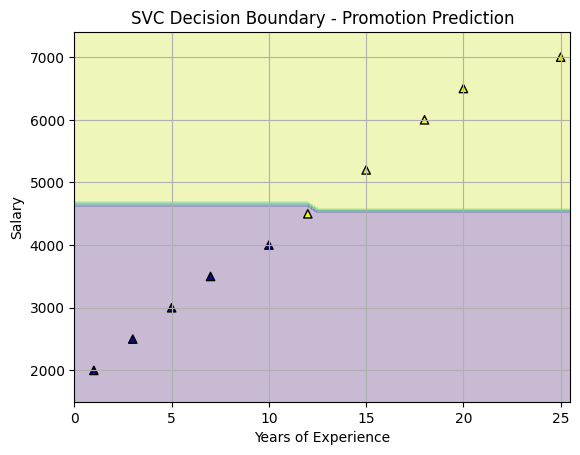

In [49]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Changed colormap
plt.scatter(X['experience'], X['salary'], c=y, cmap='plasma', edgecolors='k', marker='^')  # Changed color & marker
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('SVC Decision Boundary - Promotion Prediction')
plt.grid(True)
plt.show()